#### Predicting players rating

In this project you are going to predict the overall rating of soccer player based on their attributes such as 'crossing', 'finishing etc.

The dataset you are going to use is from European Soccer Database (https://www.kaggle.com/hugomathien/soccer) has more than 25,000 matches and more than 10,000 players for European professional soccer seasons from 2008 to 2016.

Download the data in the same folder and run the following commmand to get it in the environment.

About the Dataset

The ultimate Soccer database for data analysis and machine learning. The dataset comes in the form of an SQL database and contains statistics of about 25,000 football matches, from the top football league of 11 European Countries. It covers seasons from 2008 to 2016 and contains match statistics (i.e: scores, corners, fouls etc...) as well as the team
formations, with player names and a pair of coordinates to indicate their position on the pitch.

    •	+25,000 matches
    •	+10,000 players
    •	11 European Countries with their lead championship
    •	Seasons 2008 to 2016
    •	Players and Teams' attributes* sourced from EA Sports' FIFA video game series, including
    •	the weekly updates
    •	Team line up with squad formation (X, Y coordinates)
    •	Betting odds from up to 10 providers
    •	Detailed match events (goal types, possession, corner, cross, fouls, cards etc...) for
    •	+10,000 matches

The dataset also has a set of about 35 statistics for each player, derived from EA Sports' FIFA video games. It is not just the stats that come with a new version of the game but also the weekly updates. So for instance if a player has performed poorly over a period of time and his stats get impacted in FIFA, you would normally see the same in the dataset.

Python skills required to complete this project 

SQL: The data is in SQL database so students need to retrive using query language. They also need to know how to connect SQL database woth python. The library we are using for this in 'sqlite3'.

SQLite3 can be integrated with Python using sqlite3 module, which was written by Gerhard Haring. It provides an SQL interface compliant with the DB-API 2.0 specification described by PEP 249. You do not need to install this module separately because it is shipped by default along with Python version 2.5.x onwards. To use sqlite3 module, you must first create a connection object that represents the database and then optionally you can create a cursor object, which will help you in executing all the SQL
statements.

Pandas: Pandas is an open-source, BSD-licensed Python library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language. Python with Pandas is used in a wide range of fields including academic and commercial domains including
finance, economics, Statistics, analytics, etc.In this tutorial, we will learn the various features of Python Pandas and how to use them in practice.

Scikit Learn: Scikit-learn provides a range of supervised and unsupervised learning algorithms via a consistent interface in Python.
The library is built upon the SciPy (Scientific Python) that must be installed before you can use scikit-learn. This stack that includes:

    •	NumPy: Base n-dimensional array package
    •	SciPy: Fundamental library for scientific computing
    •	Matplotlib: Comprehensive 2D/3D plotting
    •	IPython: Enhanced interactive console
    •	Sympy: Symbolic mathematics
    •	Pandas: Data structures and analysis

Extensions or modules for SciPy care conventionally named SciKits. As such, the module provides learning algorithms and is named scikit-learn.

The vision for the library is a level of robustness and support required for use in production systems. This means a deep focus on concerns such as easy of use, code quality, collaboration, documentation and performance.

Machine Learning skills required to complete the project

Supervised learning

Supervised learning deals with learning a function from available training data. A supervised learning algorithm analyzes the training data and produces an inferred function, which can be used for mapping new examples.

Regression

Regression is a parametric technique used to predict continuous (dependent) variable given a set of independent variables. It is parametric in nature because it makes certain assumptions (discussed next) based on the data set. If the data set follows those assumptions, regression gives incredible results.

Model evaluation

Student must know how to judge a model on unseen data. What metric to select to judge the performance


Let's get started.....

Import Libraries

    import sqlite3
    import pandas as pd
    from sklearn.tree import DecisionTreeRegressor 
    from sklearn.linear_model import LinearRegression 
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import mean_squared_error 
    from math import sqrt

Read Data from the Database into pandas


Create your connection.

    cnx = sqlite3.connect('database.sqlite')
    df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)
    df.head()

Task: Deploy this assignment in any cloud platform.(Try to look for free cloud platform)

Assignment: Submit assignment’s deployable link only.

In [1]:
import sqlite3
import numpy as np
import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
from xgboost import plot_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit, RandomizedSearchCV
from sklearn.pipeline import make_pipeline
import pickle

Reading Data from the Database into pandas

In [33]:
cnx = sqlite3.connect('datafiles/database.sqlite')

In [34]:
df= pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

In [35]:
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


Creating Target variable:

In [36]:
target = df.pop('overall_rating')

In [37]:
target.head()

0    67.0
1    67.0
2    62.0
3    61.0
4    61.0
Name: overall_rating, dtype: float64

In [38]:
df.shape

(183978, 41)

In [39]:
df.head()

,id,player_fifa_api_id,player_api_id,date,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,71.0,right,medium,medium,49.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,71.0,right,medium,medium,49.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,66.0,right,medium,medium,49.0,44.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,65.0,right,medium,medium,48.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,65.0,right,medium,medium,48.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


Imputing target funtion :

In [40]:
target.isnull().sum()

836

In [41]:
target.describe()

count    183142.000000
mean         68.600015
std           7.041139
min          33.000000
25%          64.000000
50%          69.000000
75%          73.000000
max          94.000000
Name: overall_rating, dtype: float64

In [42]:
(target.isnull().sum()/target.shape[0]) *100 

0.45440215677961493

It's almost normal distribution so we can impute mean value for missing value in target.

In [43]:
y = target.fillna(target.mean())

In [44]:
y.isnull().values.any()

False

<IPython.core.display.Javascript object>


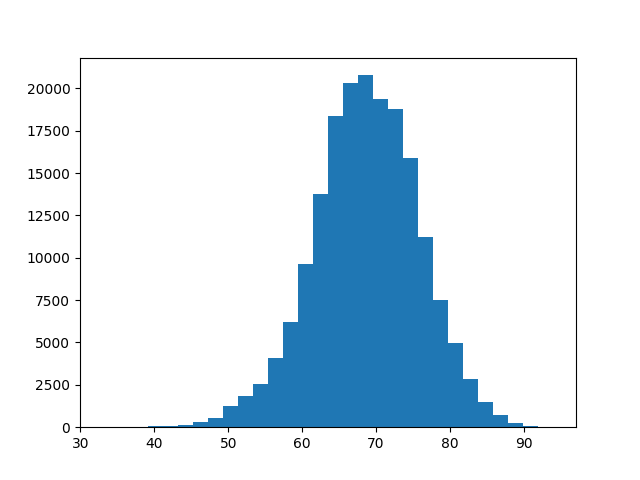

(array([7.0000e+00, 6.0000e+00, 2.0000e+01, 6.5000e+01, 9.4000e+01,
        1.4200e+02, 2.9400e+02, 5.2600e+02, 1.2510e+03, 1.8450e+03,
        2.5780e+03, 4.0870e+03, 6.1890e+03, 9.6500e+03, 1.3745e+04,
        1.8366e+04, 2.0310e+04, 2.0773e+04, 1.9382e+04, 1.8784e+04,
        1.5915e+04, 1.1254e+04, 7.5250e+03, 4.9470e+03, 2.8290e+03,
        1.4590e+03, 7.4800e+02, 2.2800e+02, 8.4000e+01, 3.9000e+01]),
 array([33.        , 35.03333333, 37.06666667, 39.1       , 41.13333333,
        43.16666667, 45.2       , 47.23333333, 49.26666667, 51.3       ,
        53.33333333, 55.36666667, 57.4       , 59.43333333, 61.46666667,
        63.5       , 65.53333333, 67.56666667, 69.6       , 71.63333333,
        73.66666667, 75.7       , 77.73333333, 79.76666667, 81.8       ,
        83.83333333, 85.86666667, 87.9       , 89.93333333, 91.96666667,
        94.        ]),
 <BarContainer object of 30 artists>)

In [45]:
plt.hist(target, 30, range=(33, 94))

Data Exploration :

In [46]:
df.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'potential',
       'preferred_foot', 'attacking_work_rate', 'defensive_work_rate',
       'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'free_kick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'marking', 'standing_tackle', 'sliding_tackle', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes'],
      dtype='object')

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 41 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   potential            183142 non-null  float64
 5   preferred_foot       183142 non-null  object 
 6   attacking_work_rate  180748 non-null  object 
 7   defensive_work_rate  183142 non-null  object 
 8   crossing             183142 non-null  float64
 9   finishing            183142 non-null  float64
 10  heading_accuracy     183142 non-null  float64
 11  short_passing        183142 non-null  float64
 12  volleys              181265 non-null  float64
 13  dribbling            183142 non-null  float64
 14  curve                181265 non-null  float64
 15  free_kick_accurac

In [48]:
X = df.copy()

In [49]:
X.head()

,id,player_fifa_api_id,player_api_id,date,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,71.0,right,medium,medium,49.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,71.0,right,medium,medium,49.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,66.0,right,medium,medium,49.0,44.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,65.0,right,medium,medium,48.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,65.0,right,medium,medium,48.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [50]:
X = X.drop(['id','date'], axis=1)

In [51]:
# Define which columns should be ordinal-encoded and which should be scaled
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(exclude='object').columns

In [52]:
categorical_cols

Index(['preferred_foot', 'attacking_work_rate', 'defensive_work_rate'], dtype='object')

In [53]:
X['preferred_foot'].unique()

array(['right', 'left', None], dtype=object)

In [54]:
X['attacking_work_rate'].unique()

array(['medium', 'high', None, 'low', 'None', 'le', 'norm', 'stoc', 'y'],
      dtype=object)

In [56]:
X['defensive_work_rate'].unique()

array(['medium', 'high', 'low', '_0', None, '5', 'ean', 'o', '1', 'ormal',
       '7', '2', '8', '4', 'tocky', '0', '3', '6', '9', 'es'],
      dtype=object)

In [57]:
from sklearn.impute import SimpleImputer ## HAndling Missing Values
from sklearn.preprocessing import StandardScaler # HAndling Feature Scaling
from sklearn.preprocessing import OrdinalEncoder # Ordinal Encoding
from sklearn.preprocessing import OneHotEncoder # Ordinal Encoding
## pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [58]:
num_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())
    ]
)

# Categorigal Pipeline
cat_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('OneHotEncoder',OneHotEncoder()),
    ]
)

preprocessor=ColumnTransformer([
('num_pipeline',num_pipeline,numerical_cols),
('cat_pipeline',cat_pipeline,categorical_cols)
])

In [59]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=30)

In [60]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

In [61]:
X.shape, X_train.shape

((183978, 39), (128784, 68))

In [62]:
X_train.head()

,num_pipeline__player_fifa_api_id,num_pipeline__player_api_id,num_pipeline__potential,num_pipeline__crossing,num_pipeline__finishing,num_pipeline__heading_accuracy,num_pipeline__short_passing,num_pipeline__volleys,num_pipeline__dribbling,num_pipeline__curve,...,cat_pipeline__defensive_work_rate__0,cat_pipeline__defensive_work_rate_ean,cat_pipeline__defensive_work_rate_es,cat_pipeline__defensive_work_rate_high,cat_pipeline__defensive_work_rate_low,cat_pipeline__defensive_work_rate_medium,cat_pipeline__defensive_work_rate_o,cat_pipeline__defensive_work_rate_ormal,cat_pipeline__defensive_work_rate_tocky,cat_pipeline__defensive_work_rate_None
0,-0.127712,-0.712688,0.996413,0.405135,0.110130,-0.137281,1.668019,0.856072,0.781954,1.271775,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.433998,-0.442604,-0.067809,0.579435,1.214548,0.834330,0.042631,1.297008,0.386703,0.168371,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,-0.131901,-0.450631,-0.523904,0.579435,-0.310601,0.166348,0.537314,-0.411620,0.047917,0.002861,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.487004,0.798830,0.540318,0.986135,0.478269,0.530701,0.466645,0.360018,0.669025,0.168371,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.466617,0.177963,-0.067809,0.463235,-1.888341,-0.623086,0.042631,-0.797439,-0.347334,-1.100543,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


As tree model doesn't gets affected by missing values present in data set. but feature selection by SelectFromModel can not be done on datasets that carries null value. Therefore, we should also perform imputation on dataset.

### Training different models :
### 1. Linear Regression :

In [63]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [64]:
linear_reg.score(X_test, y_test)

0.8603055607641394

### Hyperparameter Tuning:

In [65]:
cv = ShuffleSplit(random_state=0)   #defining type of cross_validation(shuffle spliting)

param_grid = {'n_jobs': [-1]}     #parameters for model tunning

grid = GridSearchCV(linear_reg, param_grid=param_grid, cv=cv)

In [66]:
grid.fit(X_train, y_train) 

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=0, test_size=None, train_size=None),
             estimator=LinearRegression(), param_grid={'n_jobs': [-1]})

In [67]:
grid.best_params_

{'n_jobs': -1}

In [68]:
grid.best_estimator_

LinearRegression(n_jobs=-1)

In [69]:
new_linear_reg = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1)
new_linear_reg.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [70]:
new_linear_reg.score(X_test, y_test)

0.8603055607641394

### 2. Decision Tree :

In [71]:
decision_tree = DecisionTreeRegressor(criterion='friedman_mse', random_state=0)         #estimator
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse', random_state=0)

In [72]:
decision_tree.score(X_test, y_test)

0.9583701280883454

In [73]:

cv = ShuffleSplit(n_splits=10, random_state=42)

param_grid = {'max_depth': [3, 5, 7, 9, 13],
             'criterion': ['friedman_mse']}

grid = GridSearchCV(decision_tree, param_grid=param_grid, cv=cv)

In [74]:
grid.fit(X_train, y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=42, test_size=None, train_size=None),
             estimator=DecisionTreeRegressor(criterion='friedman_mse',
                                             random_state=0),
             param_grid={'criterion': ['friedman_mse'],
                         'max_depth': [3, 5, 7, 9, 13]})

In [75]:
grid.best_params_

{'criterion': 'friedman_mse', 'max_depth': 13}

In [76]:
grid.best_estimator_

DecisionTreeRegressor(criterion='friedman_mse', max_depth=13, random_state=0)

In [78]:
new_deci_tree = DecisionTreeRegressor(criterion='friedman_mse', max_depth=13, random_state=0)
new_deci_tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=13, random_state=0)

In [79]:
new_deci_tree.score(X_test, y_test)

0.9293338101837106

### 3. Random Forest :

In [80]:
rand_forest = RandomForestRegressor(random_state=123)
rand_forest.fit(X_train, y_train)

RandomForestRegressor(random_state=123)

In [81]:
rand_forest.score(X_test, y_test)

0.9806505483313053

### Hyperparameter Tuning:

In [82]:
cv = ShuffleSplit(test_size=0.2, random_state=0)

param_grid = {'max_features':['sqrt', 'log2', 10],
              'max_depth':[9, 11, 13]}                 

grid = GridSearchCV(rand_forest, param_grid=param_grid, cv=cv)

In [83]:
grid.fit(X_train, y_train) 

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=0, test_size=0.2, train_size=None),
             estimator=RandomForestRegressor(random_state=123),
             param_grid={'max_depth': [9, 11, 13],
                         'max_features': ['sqrt', 'log2', 10]})

In [84]:
grid.best_estimator_

RandomForestRegressor(max_depth=13, max_features=10, random_state=123)

In [87]:
new_rand_forest = RandomForestRegressor(bootstrap=True, criterion='friedman_mse', max_depth=10,
           max_features=13,  random_state=42,)
new_rand_forest.fit(X_train, y_train)

RandomForestRegressor(criterion='friedman_mse', max_depth=10, max_features=13,
                      random_state=42)

In [88]:
new_rand_forest.score(X_test, y_test)

0.9424322902722811

### 4. Xgboost regressor :

In [91]:
print("""Linear Regressor accuracy is {lin}
DecisionTree Regressor accuracy is {Dec}
RandomForest regressor accuracy is {ran}""".format(lin=new_linear_reg.score(X_test, y_test),
                                                       Dec=new_deci_tree.score(X_test, y_test),
                                                       ran=new_rand_forest.score(X_test, y_test)))

Linear Regressor accuracy is 0.8603055607641394
DecisionTree Regressor accuracy is 0.9293338101837106
RandomForest regressor accuracy is 0.9424322902722811


By accuracy comparision performed above we can say hear that Random Forest regressor gives better result than any other model. and it can predict the target function with approx 94% accuracy.